## Кейс 1. Ad hoc в агрегаторе такси

Вы работаете продуктовым аналитиком в агрегаторе такси SkyTaxi.

У вас есть бэклог из нескольких задач Ad hoc.

Для их решения рассмотрите основную конверсию из заказа в поездку Order2Ride, а также промежуточные три звена конверсии, из которых состоит Order2Ride (Order2Assign, Assign2Arrive, Arrive2Ride).

Скачайте отсюда (https://drive.google.com) следующие csv-файлы:

Data_Skytaxi.csv
city_dict.csv
tariff_dict.csv
Оформите решение в Jupyter-тетради в формате .ipynb.
Подготовьте единую презентацию (в формате .pptx) с результатами всех задач кейса.
Добавьте свою презентацию и ссылку на Jupyter-тетрадь на доску Miro (https://miro.com). Проголосуйте за наиболее понравившиеся вам работы.


In [1]:
import pandas as pd

In [2]:
df_city = pd.read_csv('city_dict.csv', sep = ';' )

In [3]:
df_city

,id_city,name_city
0,11,Москва
1,12,Санкт-Петербург
2,13,Казань
3,14,Новосибирск
4,15,Краснодар
5,16,Красноярск
6,17,Тюмень
7,18,Хабаровск
8,19,Екатеринбург


In [4]:
df_tariff = pd.read_csv('tariff_dict.csv', sep = ';' )

In [5]:
df_tariff

,id_tariff,name_tariff
0,111,Эконом
1,112,Комфорт
2,113,Комфорт+
3,114,Бизнес
4,115,Доставка


In [6]:
df = pd.read_csv('Data_Skytaxi.csv', sep = ';')

In [7]:
df

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN
1,1146340,114,11,02.08.2022 19:12,02.08.2022 19:19,02.08.2022 19:26,02.08.2022 19:50
2,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16
3,1137227,111,17,03.08.2022 15:45,NaN,NaN,NaN
4,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26
...,...,...,...,...,...,...,...
10015,1139224,112,11,02.08.2022 8:52,02.08.2022 8:59,NaN,NaN
10016,1140346,111,15,03.08.2022 8:48,NaN,NaN,NaN
10017,1138341,111,12,07.08.2022 0:35,NaN,NaN,NaN
10018,1145927,112,11,04.08.2022 3:24,04.08.2022 3:29,04.08.2022 3:34,04.08.2022 3:59


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          10020 non-null  int64 
 1   id_tariff         10020 non-null  int64 
 2   id_city           10020 non-null  int64 
 3   order_time        10020 non-null  object
 4   assign_time       6743 non-null   object
 5   arrive_time       5345 non-null   object
 6   ride_finish_time  4834 non-null   object
dtypes: int64(3), object(4)
memory usage: 548.1+ KB


#### Задание 1

Изучите утренние и вечерние часы пик.

 Постройте график с количеством заказов по суточным часам (на оси Х — часы от 0 до 23).
 На сколько за один час в среднем делается больше заказов в часы пик, чем в обычное время? (По всем городам вместе.)

In [9]:
import datetime

In [10]:
df['order_time'] = pd.to_datetime(df['order_time']) #переводим столбец с датой в формат даты и времени

In [11]:
df['hour'] = df['order_time'].dt.hour #выделяем из даты и времени часы 

In [12]:
df.head(3)

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,hour
0,1146020,111,13,2022-04-08 07:12:00,NaN,NaN,NaN,7
1,1146340,114,11,2022-02-08 19:12:00,02.08.2022 19:19,02.08.2022 19:26,02.08.2022 19:50,19
2,1142747,112,13,2022-01-08 13:47:00,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16,13


In [13]:
import matplotlib.pyplot as plt

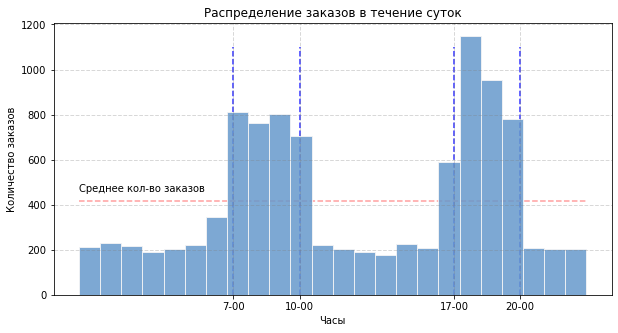

In [14]:
plt.figure(figsize = (10, 5)) #строим график распределения заказов по часам по всем городам вместе
plt.hist(df['hour'], bins = 24, color = '#6699cc', alpha = 0.85, edgecolor = '#f5f5f5')
plt.title("Распределение заказов в течение суток")
plt.xlabel('Часы')
plt.ylabel('Количество заказов')
plt.hlines(df.groupby('hour')['order_id'].count().mean(), xmin = 0, xmax = 23, colors = '#ff9494', linestyles='dashed', alpha = 0.9, zorder = 0)
plt.text(0, 470, 'Среднее кол-во заказов', ha='left', va='center')
plt.vlines(x=[7, 10, 17, 20], ymin = 0, ymax = 1100, colors = 'blue', linestyles='dashed', alpha = 0.8, zorder = 0)
plt.xticks([7, 10, 17, 20], ['7-00', '10-00', '17-00', '20-00'])
plt.grid(color='grey', linestyle='--', linewidth=1, alpha = 0.3)
plt.show()

Часы-пик приходятся на периоды 7-10 и 17-20.

In [15]:
#помечаем обычные часы и часы-пик соответствующими метками
df['rush_or_ordinary'] = df['hour'].apply(lambda x: 'rush' if x in (7,8,9,10,17,18,19,20) else 'ordinary') 

In [16]:
df.head(3)

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,hour,rush_or_ordinary
0,1146020,111,13,2022-04-08 07:12:00,NaN,NaN,NaN,7,rush
1,1146340,114,11,2022-02-08 19:12:00,02.08.2022 19:19,02.08.2022 19:26,02.08.2022 19:50,19,rush
2,1142747,112,13,2022-01-08 13:47:00,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16,13,ordinary


In [17]:
#группируем данные по обычным часам и часам-пик для сравнения среднего количества заказов в час
r_o = df.groupby(['rush_or_ordinary', 'hour'])['order_id'].count().reset_index().groupby('rush_or_ordinary')['order_id'].mean().reset_index()
r_o

,rush_or_ordinary,order_id
0,ordinary,216.6875
1,rush,819.1250


In [18]:
819-217

602

In [19]:
import numpy as np

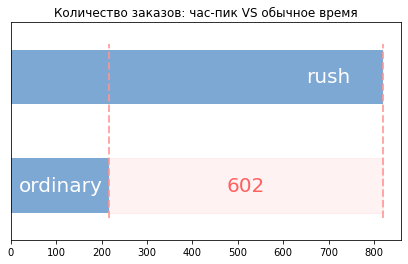

In [20]:
ax = r_o.plot.barh(x = 'rush_or_ordinary', y = 'order_id',  legend = False, figsize = (7, 4), title = "Количество заказов: час-пик VS обычное время", color = '#6699cc', alpha = 0.85)
ax.axes.get_yaxis().set_visible(False)
plt.vlines(x=[r_o['order_id'][0], r_o['order_id'][1]], ymin = -0.3, ymax = 1.3, colors = '#ff9494', linestyles='dashed', linewidths = 2, alpha = 0.8)
plt.text(s = int((r_o['order_id'][1] - r_o['order_id'][0])), x = 518, y = -0.05, ha='center', fontsize=20, color='#ff6161')
x = (r_o['order_id'][0], r_o['order_id'][1])
y = np.arange(0.25, 0.7)
y1 = np.arange(-0.25, 0)
plt.fill_between(x, y, y1, color = 'red', alpha = 0.05 )
plt.text(s = 'rush', x = 700, y = 0.95, ha='center', fontsize=20, color='w')
plt.text(s = 'ordinary', x = 110, y = -0.05, ha='center', fontsize=20, color='w')
plt.show()

Разница между часами-пик и обычным времени составляет в среднем 602 заказа в час по всем городам вместе.

Вычислим эту разницу в разбивке по городам:

In [21]:
#группируем данные по городам сначала для обычных часов
df_ordinary_city = df.loc[df['rush_or_ordinary'] == 'ordinary'].groupby(['id_city', 'hour'])['order_id'].count().reset_index().groupby('id_city')['order_id'].mean().reset_index()
df_ordinary_city

,id_city,order_id
0,11,68.6875
1,12,46.7500
2,13,18.8125
3,14,17.1250
4,15,14.9375
5,16,10.7500
6,17,14.1250
7,18,13.0625
8,19,12.4375


In [22]:
#теперь для часов-пик
df_rush_city = df.loc[df['rush_or_ordinary'] == 'rush'].groupby(['id_city', 'hour'])['order_id'].count().reset_index().groupby('id_city')['order_id'].mean().reset_index()
df_rush_city

,id_city,order_id
0,11,251.500
1,12,166.500
2,13,75.750
3,14,71.625
4,15,61.875
5,16,41.375
6,17,50.750
7,18,51.875
8,19,47.875


In [23]:
df_ro_city = df_ordinary_city.merge(df_rush_city, on ='id_city').merge(df_city, on ='id_city') #полученные таблицы объединяем между собой и со справочником городов
df_ro_city.columns = ('id_city', 'count_ordinary', 'count_rush', 'name_city') #перименовываем столбцы для корректного обозначения данных
df_ro_city['difference'] = df_ro_city['count_rush'] - df_ro_city['count_ordinary'] #вычисляем количественную разницу заказов в часы пик и обычные часы по городам
df_ro_city['difference_perc'] = round((df_ro_city['count_rush'] - df_ro_city['count_ordinary'])*100/df_ro_city['count_ordinary'], 0) #та же разница, но в процентном выражении
df_ro_city = df_ro_city[['name_city', 'count_ordinary', 'count_rush', 'difference', 'difference_perc']].sort_values(by = 'difference_perc',  ascending = False).reset_index() #отбрасываем лишние столбцы и сортируем по интересующему показателю
df_ro_city = df_ro_city.drop(columns = 'index')
df_ro_city

,name_city,count_ordinary,count_rush,difference,difference_perc
0,Новосибирск,17.1250,71.625,54.5000,318.0
1,Краснодар,14.9375,61.875,46.9375,314.0
2,Казань,18.8125,75.750,56.9375,303.0
3,Хабаровск,13.0625,51.875,38.8125,297.0
4,Красноярск,10.7500,41.375,30.6250,285.0
5,Екатеринбург,12.4375,47.875,35.4375,285.0
6,Москва,68.6875,251.500,182.8125,266.0
7,Тюмень,14.1250,50.750,36.6250,259.0
8,Санкт-Петербург,46.7500,166.500,119.7500,256.0


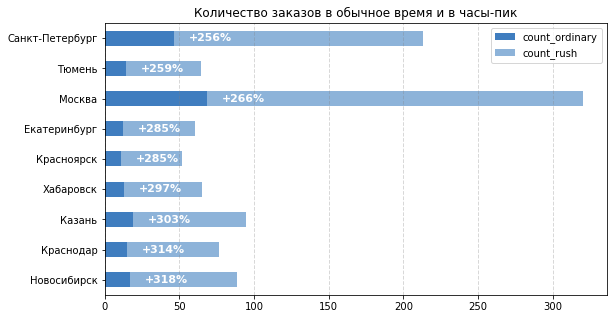

In [24]:
#построим график для наглядности
ax = df_ro_city.plot.barh(x = 'name_city', y = ['count_ordinary', 'count_rush'], figsize = (9, 5), xlabel = '', title = "Количество заказов в обычное время и в часы-пик", color = ('#3f7dbf', '#8db3d9'), stacked=True)                                                       
ax.xaxis.grid(True, color='grey', linestyle='--', linewidth=1, alpha = 0.3)
for i in range(0,9):
    plt.text(s = '+'+ str(int(df_ro_city['difference_perc'][i])) + '%', x = df_ro_city['count_ordinary'][i]+10, y = i-0.1, fontsize = 11, fontweight = 'semibold', color = 'w')
plt.show()

Наибольшая процентная разница между обычными заказа и заказами в часы-пик в Новосибирске (+318%), наименьшая - в Санкт-Петербурге (+256%).

In [25]:
#вычислим общую конверсию из заказов в поездки по городам
df_o2r = df.groupby(['id_city', 'rush_or_ordinary', 'hour']).agg({'order_time':'count', 'ride_finish_time':'count'}) #группируем по городам и часам
df_o2r['order2ride'] = round(df_o2r['ride_finish_time']*100/df_o2r['order_time'], 0) #вычисляем конверсию для каждого города в каждом часу
df_o2r

order_time  ride_finish_time  order2ride
id_city rush_or_ordinary hour                                          
11      ordinary         0             68                40        59.0
                         1             70                40        57.0
                         2             72                46        64.0
                         3             65                44        68.0
                         4             59                33        56.0
...                                   ...               ...         ...
19      rush             10            43                26        60.0
                         17            36                23        64.0
                         18            60                26        43.0
                         19            60                32        53.0
                         20            45                24        53.0

[216 rows x 3 columns]

In [26]:
#группируем еще раз для вычисления среднего значения для часов-пик и обычных
df_o2r = round(df_o2r.groupby(['id_city', 'rush_or_ordinary'])['order2ride'].mean(), 0).reset_index()
df_o2r = df_o2r.pivot(index='id_city', columns='rush_or_ordinary', values='order2ride').reset_index()
df_o2r

rush_or_ordinary,id_city,ordinary,rush
0,11,56.0,44.0
1,12,55.0,46.0
2,13,56.0,55.0
3,14,61.0,59.0
4,15,60.0,57.0
5,16,33.0,41.0
6,17,27.0,27.0
7,18,22.0,28.0
8,19,56.0,58.0


In [27]:
df_o2r = df_o2r.merge(df_city, on ='id_city') #объединяем со справочником городов

In [28]:
#удаляем ненужные и переименовываем нужные столбцы
df_o2r = df_o2r[['name_city', 'ordinary', 'rush']]
df_o2r.columns = ('name_city', 'o2r_ordinary', 'o2r_rush')

In [29]:
df_o2r['o2r_difference'] = df_o2r['o2r_rush'] - df_o2r['o2r_ordinary'] #вычисляем разницу в конверсии в процентных пунктах
df_o2r

,name_city,o2r_ordinary,o2r_rush,o2r_difference
0,Москва,56.0,44.0,-12.0
1,Санкт-Петербург,55.0,46.0,-9.0
2,Казань,56.0,55.0,-1.0
3,Новосибирск,61.0,59.0,-2.0
4,Краснодар,60.0,57.0,-3.0
5,Красноярск,33.0,41.0,8.0
6,Тюмень,27.0,27.0,0.0
7,Хабаровск,22.0,28.0,6.0
8,Екатеринбург,56.0,58.0,2.0


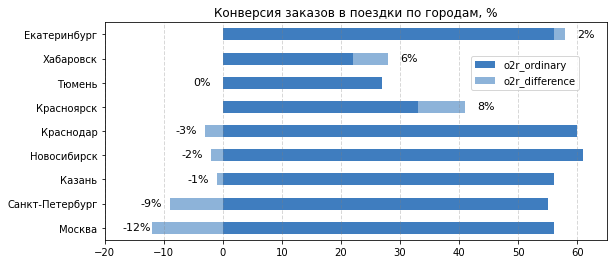

In [30]:
ax = df_o2r.plot.barh(x = 'name_city', y = ['o2r_ordinary', 'o2r_difference'], xlim=(-20, 65), legend = False, figsize = (9, 4), xlabel = '', title = "Конверсия заказов в поездки по городам, %", color = ('#3f7dbf', '#8db3d9'), stacked=True)                                                       
ax.xaxis.grid(True, color='grey', linestyle='--', linewidth=1, alpha = 0.3)
plt.legend(bbox_to_anchor=(0.72, 0.87))
for i in range(0,9):
    if df_o2r['o2r_difference'][i]>0:
        plt.text(s = str(int(df_o2r['o2r_difference'][i])) + '%', y = i-0.1, fontsize = 11, color = 'black', x = df_o2r['o2r_rush'][i]+2)
    else:
        plt.text(s = str(int(df_o2r['o2r_difference'][i])) + '%', y = i-0.1, fontsize = 11, color = 'black', x = df_o2r['o2r_difference'][i]-5)
        
plt.show()

Наибольшее падение конверсии вызова в заказ в часы-пик наблюдается в Москве (-12%), наибольший рост конверсии - в Красноярске (+8%).

________

#### Задание 2

Изучите заказы в Хабаровске и Тюмени. Эти города интересуют менеджеров, так как в них наша компания начала работать относительно недавно.

 На сколько процентных пунктов Order2Ride в среднем в них ниже, чем в других городах?
 За счет какого звена воронки достигается эта разница? Сделайте выводы по Хабаровску и по Тюмени по отдельности.
 Какие рекомендации вы можете дать локальным менеджерам?

In [31]:
#группируем данные для вычисления количества заказов на этапах
df_aggr = df.groupby('id_city').agg({'order_time':'count', 'assign_time':'count', 'arrive_time':'count', 'ride_finish_time':'count'}).reset_index()
df_aggr.head(3)

,id_city,order_time,assign_time,arrive_time,ride_finish_time
0,11,3111,2131,1594,1505
1,12,2080,1365,1099,1033
2,13,907,687,528,506


In [32]:
#напишем функцию расчета общей и поэтапной конверсии
def conv (x):
    x['order2assign'] = round(x['assign_time']*100/x['order_time'], 2) #вычисляем конверсию из заказа в назначение
    x['assign2arrive'] = round(x['arrive_time']*100/x['assign_time'], 2)  #вычисляем конверсию из назначения в прибытие 
    x['arrive2ride'] = round(x['ride_finish_time']*100/x['arrive_time'], 2) #вычисляем конверсию из прибытия в поездку
    x['order2ride'] = round(x['ride_finish_time']*100/x['order_time'], 2) #общая конверсия из заказа в поездку
    return x

In [33]:
df_aggr = conv(df_aggr)
df_aggr

,id_city,order_time,assign_time,arrive_time,ride_finish_time,order2assign,assign2arrive,arrive2ride,order2ride
0,11,3111,2131,1594,1505,68.50,74.80,94.42,48.38
1,12,2080,1365,1099,1033,65.62,80.51,93.99,49.66
2,13,907,687,528,506,75.74,76.86,95.83,55.79
3,14,847,634,525,501,74.85,82.81,95.43,59.15
4,15,734,548,457,428,74.66,83.39,93.65,58.31
5,16,503,376,320,195,74.75,85.11,60.94,38.77
6,17,632,352,295,169,55.70,83.81,57.29,26.74
7,18,624,213,173,164,34.13,81.22,94.80,26.28
8,19,582,437,354,333,75.09,81.01,94.07,57.22


In [34]:
df_aggr = df_aggr.merge(df_city, on ='id_city') #соединяем со словарем городов

In [35]:
df_aggr = df_aggr[['name_city', 'order2assign', 'assign2arrive', 'arrive2ride', 'order2ride']]
df_aggr

,name_city,order2assign,assign2arrive,arrive2ride,order2ride
0,Москва,68.50,74.80,94.42,48.38
1,Санкт-Петербург,65.62,80.51,93.99,49.66
2,Казань,75.74,76.86,95.83,55.79
3,Новосибирск,74.85,82.81,95.43,59.15
4,Краснодар,74.66,83.39,93.65,58.31
5,Красноярск,74.75,85.11,60.94,38.77
6,Тюмень,55.70,83.81,57.29,26.74
7,Хабаровск,34.13,81.22,94.80,26.28
8,Екатеринбург,75.09,81.01,94.07,57.22


In [36]:
#средняя конверсия из заказа в поездку по Тюмени и Хабаровску
mean_conv_hab_tum = round(df_aggr.loc[(df_aggr['name_city'] =='Тюмень')|(df_aggr['name_city'] =='Хабаровск')]['order2ride'].mean(), 2)
mean_conv_hab_tum

26.51

In [37]:
#средняя конверсия из заказа в поездку по остальным городам
mean_conv_ex_hab_tum = round(df_aggr.loc[(df_aggr['name_city'] !='Тюмень')&(df_aggr['name_city'] !='Хабаровск')]['order2ride'].mean(), 2)
mean_conv_ex_hab_tum

52.47

In [38]:
round(mean_conv_ex_hab_tum - mean_conv_hab_tum, 2) #разница средней конверсии из заказа в поездку

25.96

In [39]:
t_h_02r = df_aggr.groupby((df_aggr['name_city'] !='Тюмень')&(df_aggr['name_city'] !='Хабаровск'))['order2ride'].mean().reset_index().sort_values(by = 'order2ride', ascending = False)
t_h_02r

,name_city,order2ride
1,True,52.468571
0,False,26.510000


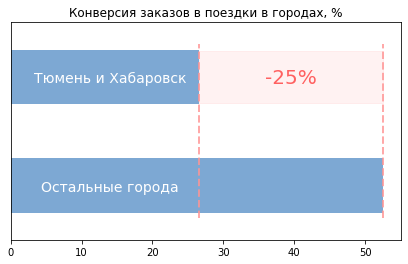

In [40]:
ax = t_h_02r.plot.barh(x = 'name_city', y = 'order2ride',  legend = False, figsize = (7, 4), title = "Конверсия заказов в поездки в городах, %", color = '#6699cc', alpha = 0.85)
ax.axes.get_yaxis().set_visible(False)
plt.vlines(x=[t_h_02r['order2ride'][0], t_h_02r['order2ride'][1]], ymin = -0.3, ymax = 1.3, colors = '#ff9494', linestyles='dashed', linewidths = 2, alpha = 0.8)
plt.text(s = str(int((t_h_02r['order2ride'][0] - t_h_02r['order2ride'][1])))+'%', x = 39.5, y = 0.94, ha='center', fontsize=20, color='#ff6161')
x = (t_h_02r['order2ride'][0], t_h_02r['order2ride'][1])
y = np.arange(0.76, 1)
y1 = np.arange(1.24, 2)
plt.fill_between(x, y, y1, color = 'red', alpha = 0.05 )
plt.text(s = 'Тюмень и Хабаровск', x = 14, y = 0.95, ha='center', fontsize=14, color='w')
plt.text(s = 'Остальные города', x = 14, y = -0.05, ha='center', fontsize=14, color='w')
plt.show()

Конверсия из заказа в поездку в Хабаровске и Тюмени в среднем на 26 процентных пункта меньше, чем в других городах.

In [41]:
#транспонируем таблицу для построения графика
df_aggr_tab = df_aggr.transpose()
df_aggr_tab.columns = df_aggr_tab.iloc[0]
df_aggr_tab = df_aggr_tab[1:]
df_aggr_tab

name_city,Москва,Санкт-Петербург,Казань,Новосибирск,Краснодар,Красноярск,Тюмень,Хабаровск,Екатеринбург
order2assign,68.5,65.62,75.74,74.85,74.66,74.75,55.7,34.13,75.09
assign2arrive,74.8,80.51,76.86,82.81,83.39,85.11,83.81,81.22,81.01
arrive2ride,94.42,93.99,95.83,95.43,93.65,60.94,57.29,94.8,94.07
order2ride,48.38,49.66,55.79,59.15,58.31,38.77,26.74,26.28,57.22


<AxesSubplot:title={'center':'Поэтапная конверсия заказов, %'}>

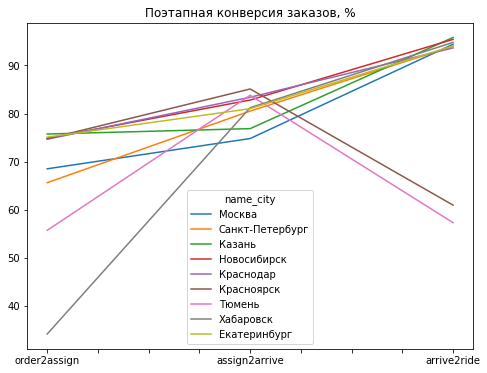

In [42]:
df_aggr_tab.loc[['order2assign', 'assign2arrive', 'arrive2ride']].plot(figsize = (8, 6), kind = 'line', title = "Поэтапная конверсия заказов, %")

Конверсия заказов в поездку по Хабаровску падает на первом этапе (из заказа в назначение), далее остается высокой.

Конверсия по Тюмени падает на двух этапах - на первом (из заказа в назначение) и третьем (из прибытия в поездку).

____

#### Задание 3
К вам обратились коллеги из отдела антифрода (отдела, предотвращающего мошенничество). У них есть подозрение, что некоторые водители мимикрируют координаты, то есть на самом деле не приезжают в точку А своего заказа, но в приложение посылают сигнал, что они в эту точку А приехали. Таким образом они вынуждают клиента отменить заказ после «прибытия ими в точку А».

Постарайтесь локализовать данную проблему и выделить города, в которых такое происходит чаще всего.

In [43]:
#сортируем ранее полученные данные по возрастанию значений в столбце конверсии прибытия в поездку
frod = df_aggr[['name_city', 'order2assign', 'assign2arrive', 'arrive2ride']].sort_values(by = 'arrive2ride').reset_index() 
frod = frod.drop(columns = 'index')
frod

,name_city,order2assign,assign2arrive,arrive2ride
0,Тюмень,55.70,83.81,57.29
1,Красноярск,74.75,85.11,60.94
2,Краснодар,74.66,83.39,93.65
3,Санкт-Петербург,65.62,80.51,93.99
4,Екатеринбург,75.09,81.01,94.07
5,Москва,68.50,74.80,94.42
6,Хабаровск,34.13,81.22,94.80
7,Новосибирск,74.85,82.81,95.43
8,Казань,75.74,76.86,95.83


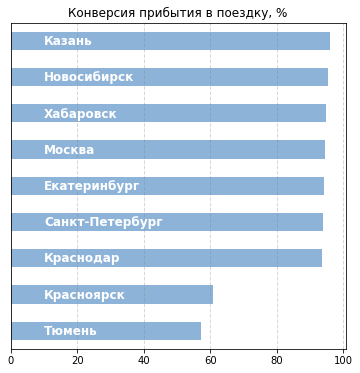

In [44]:
ax = frod.plot.barh(x = 'name_city', y = 'arrive2ride', figsize = (6, 6), legend = False, xlabel = '', title = "Конверсия прибытия в поездку, %", color = '#8db3d9')                                                       
ax.axes.get_yaxis().set_visible(False)
ax.xaxis.grid(True, color='grey', linestyle='--', linewidth=1, alpha = 0.3)
for i in range(0,9):
     plt.text(s = frod['name_city'][i], x = 10, y = i-0.1, fontsize = 12, fontweight = 'semibold', color = 'w')
plt.show()

Чаще всего отказ от поездки после прибытия происходит в Тюмени и Красноярске. Конверсия из прибытия в поездку в этих городах более чем на 30 процентных пунктов меньше, чем в других городах.

____

#### Задание 4
Тариф «Доставка» был запущен недавно по всей России. Изучите конверсии в рамках данного тарифа по городам, локализуйте просадку конверсии Order2Ride в рамках данного тарифа и дайте рекомендации отделу операционистов, которые занимаются этим тарифом.

Подсказка
 Исключите из рассмотрения города, в которых недостаточно наблюдений для оценки.
 Посмотрите O2R по городам и выделите города с наименьшим показателем.
 Посмотрите конверсии-звенья O2R и визуализируйте их с доверительными интервалами для конверсий.
 Визуализируйте O2R-доставки по сравнению с O2R других тарифов.

In [45]:
#группируем данные для вычисления количества заказов по тарифам и городам
df_aggr_del = df.groupby(['id_city', 'id_tariff']).agg({'order_time':'count', 'assign_time':'count', 'arrive_time':'count', 'ride_finish_time':'count'}).reset_index()
df_aggr_del.head(5)

,id_city,id_tariff,order_time,assign_time,arrive_time,ride_finish_time
0,11,111,1261,853,635,599
1,11,112,730,501,379,361
2,11,113,410,287,212,201
3,11,114,490,335,250,232
4,11,115,220,155,118,112


In [46]:
#исключаем города и тарифы с нулевыми конверсиями в поездку
df_aggr_delivery = df_aggr_del.loc[df_aggr_del['ride_finish_time'] != 0]
df_aggr_delivery.head(5)

,id_city,id_tariff,order_time,assign_time,arrive_time,ride_finish_time
0,11,111,1261,853,635,599
1,11,112,730,501,379,361
2,11,113,410,287,212,201
3,11,114,490,335,250,232
4,11,115,220,155,118,112


In [47]:
pd.options.mode.chained_assignment = None

In [48]:
df_aggr_delivery = conv(df_aggr_delivery)
df_aggr_delivery.head(3)

,id_city,id_tariff,order_time,assign_time,arrive_time,ride_finish_time,order2assign,assign2arrive,arrive2ride,order2ride
0,11,111,1261,853,635,599,67.64,74.44,94.33,47.50
1,11,112,730,501,379,361,68.63,75.65,95.25,49.45
2,11,113,410,287,212,201,70.00,73.87,94.81,49.02


In [49]:
#соединяем со словарем городов
df_aggr_delivery = df_aggr_delivery.merge(df_city, on ='id_city')

In [50]:
#отсортируем полученные данные по значению общей конверсии
df_115 = df_aggr_delivery[['name_city', 'order2assign', 'assign2arrive', 'arrive2ride', 'order2ride']].loc[df_aggr_delivery['id_tariff'] == 115].sort_values(by = 'order2ride').reset_index()
df_115 = df_115.drop(columns = 'index')
df_115

,name_city,order2assign,assign2arrive,arrive2ride,order2ride
0,Тюмень,25.00,72.73,87.50,15.91
1,Хабаровск,34.04,75.00,91.67,23.40
2,Красноярск,81.58,80.65,72.00,47.37
3,Москва,70.45,76.13,94.92,50.91
4,Санкт-Петербург,72.99,74.00,94.59,51.09
5,Новосибирск,66.15,90.70,97.44,58.46
6,Екатеринбург,78.72,83.78,90.32,59.57
7,Казань,76.36,80.95,97.06,60.00


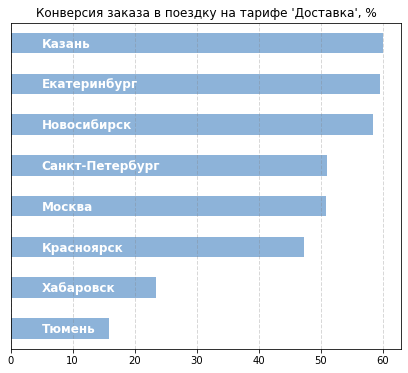

In [51]:
ax = df_115.plot.barh(x = 'name_city', y = 'order2ride', figsize = (7, 6), legend = False, xlabel = '', title = "Конверсия заказа в поездку на тарифе 'Доставка', %", color = '#8db3d9')                                                       
ax.axes.get_yaxis().set_visible(False)
ax.xaxis.grid(True, color='grey', linestyle='--', linewidth=1, alpha = 0.3)
for i in range(0,8):
     plt.text(s = df_115['name_city'][i], x = 5, y = i-0.1, fontsize = 12, fontweight = 'semibold', color = 'w')
plt.show()

In [412]:
#транспонируем для визуализации конверсии на этапах
df_delivery_tab = df_115.transpose()
df_delivery_tab.columns = df_delivery_tab.iloc[0]
df_delivery_tab = df_delivery_tab[1:]
df_delivery_tab

name_city,Тюмень,Хабаровск,Красноярск,Москва,Санкт-Петербург,Новосибирск,Екатеринбург,Казань
order2assign,25.0,34.04,81.58,70.45,72.99,66.15,78.72,76.36
assign2arrive,72.73,75.0,80.65,76.13,74.0,90.7,83.78,80.95
arrive2ride,87.5,91.67,72.0,94.92,94.59,97.44,90.32,97.06
order2ride,15.91,23.4,47.37,50.91,51.09,58.46,59.57,60.0


<AxesSubplot:title={'center':"Поэтапная конверсия заказов на тарифе 'Доставка', %"}>

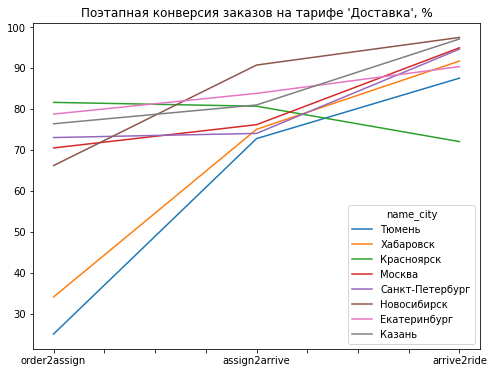

In [413]:
df_delivery_tab.loc[['order2assign', 'assign2arrive', 'arrive2ride']].plot(figsize = (8, 6), kind = 'line', title = "Поэтапная конверсия заказов на тарифе 'Доставка', %")

Общая конверсия и конверсия на первом этапе по Тюмени и Хабаровску значительно ниже, чем в остальных городах.

По Красноярску конверсия немного падает на третьем этапе (прибытие в поездку), что перемещает город по общей конверсии к Тюмени и Хабаровску. 

In [414]:
import seaborn as sns

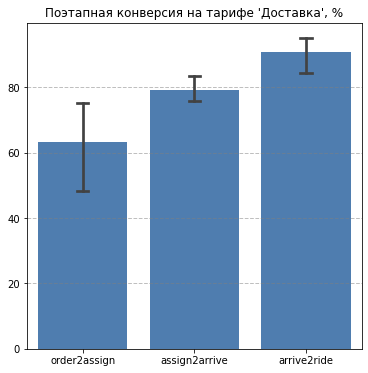

In [439]:
plt.figure(figsize = (6, 6))
plt.title("Поэтапная конверсия на тарифе 'Доставка', %")
ax = sns.barplot(data=df_115[['order2assign', 'assign2arrive', 'arrive2ride']], capsize=.1, color = '#3f7dbf')
ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=1, alpha = 0.5)
plt.show()

Конверсия на первом этапе имеет больший размер доверительного интервала, чем на других этапах.

Посмотрим на конверсию в городах кроме Тюмени и Хабаровска.

In [421]:
df_115_norm = df_115.loc[(df_115['name_city'] != 'Тюмень')&(df_115['name_city'] != 'Хабаровск')]
df_115_norm

,name_city,order2assign,assign2arrive,arrive2ride,order2ride
2,Красноярск,81.58,80.65,72.00,47.37
3,Москва,70.45,76.13,94.92,50.91
4,Санкт-Петербург,72.99,74.00,94.59,51.09
5,Новосибирск,66.15,90.70,97.44,58.46
6,Екатеринбург,78.72,83.78,90.32,59.57
7,Казань,76.36,80.95,97.06,60.00


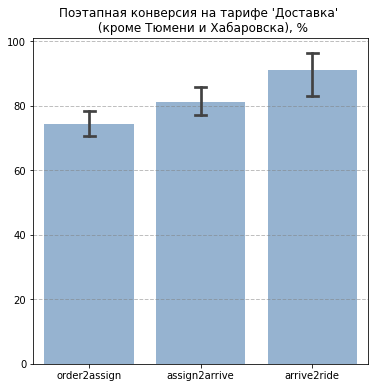

In [443]:
plt.figure(figsize = (6, 6))
plt.title("Поэтапная конверсия на тарифе 'Доставка' \n (кроме Тюмени и Хабаровска), %")
ax = sns.barplot(data=df_115_norm[['order2assign', 'assign2arrive', 'arrive2ride']], capsize=.1, color = '#8db3d9')
ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=1, alpha = 0.5)
plt.show()

Если исключить эти города (Тюмень, Хабаровск, Красноярск) из датасета, то на графике видно, что конверсия заказа от этапа к этапу увеличивается практически равномерно и имеет маленький доверительный интервал на всех этапах.

In [444]:
#сравним тарифы
df_aggr_tariff = df_aggr_del.groupby('id_tariff').sum()
df_aggr_tariff

,id_city,order_time,assign_time,arrive_time,ride_finish_time
id_tariff,,,,,
111,135,4298,2952,2352,2105
112,135,2393,1585,1270,1155
113,135,1288,875,691,610
114,135,1386,896,691,647
115,135,655,435,341,317


In [445]:
df_aggr_tariff = conv(df_aggr_tariff)
df_aggr_tariff

,id_city,order_time,assign_time,arrive_time,ride_finish_time,order2assign,assign2arrive,arrive2ride,order2ride
id_tariff,,,,,,,,,
111,135,4298,2952,2352,2105,68.68,79.67,89.50,48.98
112,135,2393,1585,1270,1155,66.23,80.13,90.94,48.27
113,135,1288,875,691,610,67.93,78.97,88.28,47.36
114,135,1386,896,691,647,64.65,77.12,93.63,46.68
115,135,655,435,341,317,66.41,78.39,92.96,48.40


In [446]:
#соединяем со словарем тарифов
df_aggr_tariff = df_aggr_tariff.merge(df_tariff, on ='id_tariff')
df_aggr_tariff = df_aggr_tariff[['name_tariff', 'order2assign', 'assign2arrive', 'arrive2ride', 'order2ride']]
df_aggr_tariff

,name_tariff,order2assign,assign2arrive,arrive2ride,order2ride
0,Эконом,68.68,79.67,89.50,48.98
1,Комфорт,66.23,80.13,90.94,48.27
2,Комфорт+,67.93,78.97,88.28,47.36
3,Бизнес,64.65,77.12,93.63,46.68
4,Доставка,66.41,78.39,92.96,48.40


In [447]:
#транспонируем для визуализации
df_aggr_tariff = df_aggr_tariff.transpose()
df_aggr_tariff.columns = df_aggr_tariff.iloc[0]
df_aggr_tariff = df_aggr_tariff[1:]
df_aggr_tariff

name_tariff,Эконом,Комфорт,Комфорт+,Бизнес,Доставка
order2assign,68.68,66.23,67.93,64.65,66.41
assign2arrive,79.67,80.13,78.97,77.12,78.39
arrive2ride,89.5,90.94,88.28,93.63,92.96
order2ride,48.98,48.27,47.36,46.68,48.4


<AxesSubplot:title={'center':'Поэтапная конверсия заказов в тарифах, %'}>

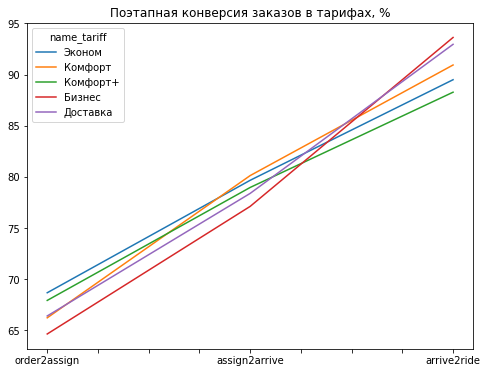

In [450]:
df_aggr_tariff.loc[['order2assign', 'assign2arrive', 'arrive2ride']].plot(figsize = (8, 6), kind = 'line', title = "Поэтапная конверсия заказов в тарифах, %")

Общая и поэтапная конверсия практически одинакова во всех тарифах.

_____


Дополнительное задание*
Вы обратились к дата-инженерам, и они согласились создать таблицы в «Хранилище», соответствующие .csv-файлам из этого кейса. Подготовьте SQL-скрипты, которые будут производить расчеты данных заданий Ad hoc на уровне «Хранилища».

#### Задание 1

In [ ]:
#подсчет количества заказов по часам
select date_part('hour', to_timestamp(order_time, 'DD.MM.YYYY HH24:MI')) as order_hour
    , count(order_id) as orders_count
from data_skytaxi
group by 1
order by 2 desc

In [ ]:
#разница в количестве заказов в обычные часы и часы-пик
with orders_by_hour as
    (
    select date_part('hour', to_timestamp(order_time, 'DD.MM.YYYY HH24:MI')) as order_hour
        , count(order_id) as orders_count
    from data_skytaxi
    group by 1
    order by 2 desc 
    ),
    rush_or_ordinary as 
    (
    select avg (case when order_hour in (7,8,9,10,17,18,19,20) then orders_count end) as rush
        , avg (case when order_hour not in (7,8,9,10,17,18,19,20) then orders_count end) as ordinary
    from orders_by_hour
    )
select *
    , (rush - ordinary) as difference
from rush_or_ordinary

In [ ]:
#разница в количестве заказов в час в обычные часы и часы-пик по городам
with orders_by_hour_city as 
    (
    select id_city
        , date_part('hour', to_timestamp(order_time, 'DD.MM.YYYY HH24:MI')) as order_hour
        , count(order_id) as orders_count
    from data_skytaxi
    group by 1, 2
    order by 1, 2
    ),
    rush_or_ordinary_city as 
    (
    select id_city
        , avg (case when order_hour in (7,8,9,10,17,18,19,20) then orders_count end) as rush
        , avg (case when order_hour not in (7,8,9,10,17,18,19,20) then orders_count end) as ordinary
    from orders_by_hour_city
    group by 1
    order by 1
    )
select name_city
    , rush, ordinary
    , (rush - ordinary) as difference
    , ((rush - ordinary)*100/ordinary) as difference_perc
from rush_or_ordinary_city r
left join city_dict cd
    on r.id_city = cd.id_city
order by 5 desc 

In [ ]:
#конверсия заказа в поездку в обычные часы и часы-пик по городам
with order2ride_by_hour_city as 
    (
    select id_city
        , date_part('hour', to_timestamp(order_time, 'DD.MM.YYYY HH24:MI')) as order_hour
        , count(ride_finish_time)*100/count(order_time) as order2ride
    from data_skytaxi
    group by 1, 2
    order by 1, 2
    ),order2ride_city as 
    (
    select name_city
        , avg (case when order_hour in (7,8,9,10,17,18,19,20) then order2ride end) as o2r_rush
        , avg (case when order_hour not in (7,8,9,10,17,18,19,20) then order2ride end) as o2r_ordinary
    from order2ride_by_hour_city o
    left join city_dict cd
    on o.id_city = cd.id_city
    group by 1
    )
select *
, o2r_rush - o2r_ordinary as o2r_difference
from order2ride_city
order by 4

#### Задание 2

In [ ]:
#пошаговая и общая конверсия заказа в поездку по всем городам
with step_counts as 
    (
    select name_city
        , count (order_time) as c_order_t
        , count (assign_time) as c_assign_t
        , count (arrive_time) as c_arrive_t
        , count (ride_finish_time) as c_rfinish_t
    from data_skytaxi d
    left join city_dict c
        on d.id_city = c.id_city
    group by name_city
    )
    select name_city
        , c_assign_t*100/c_order_t as order2assign
        , c_arrive_t*100/c_assign_t as assign2arrive
        , c_rfinish_t*100/c_arrive_t as arrive2ride
        , c_rfinish_t*100/c_order_t as order2ride
    from step_counts
    order by 5

In [ ]:
#конверсия заказа в поездку по Тюмени и Хабаровску в сравнении с остальными городами
with step_counts as 
    (
    select name_city
        , count (order_time) as c_order_t
        , count (assign_time) as c_assign_t
        , count (arrive_time) as c_arrive_t
        , count (ride_finish_time) as c_rfinish_t
    from data_skytaxi d
    left join city_dict c
        on d.id_city = c.id_city
    group by name_city
    ), s2s_conversion as 
    (
    select name_city
        , c_assign_t*100/c_order_t as order2assign
        , c_arrive_t*100/c_assign_t as assign2arrive
        , c_rfinish_t*100/c_arrive_t as arrive2ride
        , c_rfinish_t*100/c_order_t as order2ride
    from step_counts
    order by 5 
    )
select avg (case when name_city in ('Тюмень', 'Хабаровск') then order2ride end) as mean_conv_hab_tum
    , avg (case when name_city not in ('Тюмень', 'Хабаровск') then order2ride end) as mean_conv_ex_hab_tum
    , avg (case when name_city not in ('Тюмень', 'Хабаровск') then order2ride end) - avg (case when name_city in ('Тюмень', 'Хабаровск') then order2ride end) as o2r_diff
from s2s_conversion

#### Задание 3

In [ ]:
#3 этап конверсии (прибытие в поездку) по городам
with step_counts as 
    (
    select name_city
        , count (order_time) as c_order_t
        , count (assign_time) as c_assign_t
        , count (arrive_time) as c_arrive_t
        , count (ride_finish_time) as c_rfinish_t
    from data_skytaxi d
    left join city_dict c
        on d.id_city = c.id_city
    group by name_city
    )
select name_city
    , c_assign_t*100/c_order_t as order2assign
    , c_arrive_t*100/c_assign_t as assign2arrive
    , c_rfinish_t*100/c_arrive_t as arrive2ride
from step_counts
order by 4

#### Задание 4

In [ ]:
#пошаговая конверсия по всем городам и всем тарифам
with tariff_step_counts as 
    (
    select name_city
        , name_tariff
        , count (order_time) as c_order_t
        , count (assign_time) as c_assign_t
        , count (arrive_time) as c_arrive_t
        , count (ride_finish_time) as c_rfinish_t
    from data_skytaxi d
    left join city_dict c
        on d.id_city = c.id_city
    left join tariff_dict t
        on d.id_tariff = t.id_tariff 
    group by 1, 2
    )
select name_city
    , name_tariff
    , c_assign_t*100/NULLIF(c_order_t, 0) as order2assign
    , c_arrive_t*100/NULLIF(c_assign_t, 0) as assign2arrive
    , c_rfinish_t*100/NULLIF(c_arrive_t, 0) as arrive2ride
    , c_rfinish_t*100/NULLIF(c_order_t, 0) as order2ride
from tariff_step_counts
order by 6

In [ ]:
#общая и поэтапная конверсия на тарифе "Доставка" по городам, за исключением городов с недостаточными данными
select name_city
    , count (assign_time)*100/NULLIF(count (order_time), 0) as order2assign
    , count (arrive_time)*100/NULLIF(count (assign_time), 0) as assign2arrive
    , count (ride_finish_time)*100/NULLIF(count (arrive_time), 0) as arrive2ride
    , count (order_time)*100/NULLIF(count (ride_finish_time), 0) as order2ride
from data_skytaxi d
left join city_dict c
    on d.id_city = c.id_city
left join tariff_dict t
    on d.id_tariff = t.id_tariff
where name_tariff = 'Доставка'
group by 1
having count (ride_finish_time)*100/NULLIF(count (order_time), 0) is not null
order by 5

In [ ]:
#общая и поэтапная конверсия по тарифам
select name_tariff
    , count (assign_time)*100/NULLIF(count (order_time), 0) as order2assign
    , count (arrive_time)*100/NULLIF(count (assign_time), 0) as assign2arrive
    , count (ride_finish_time)*100/NULLIF(count (arrive_time), 0) as arrive2ride
    , count (ride_finish_time)*100/NULLIF(count (order_time), 0) as order2ride
from data_skytaxi d
left join tariff_dict t
    on d.id_tariff = t.id_tariff
group by 1
order by 5